# AI 11강 : k-means, k-means++
Unsupervised Learning, Clustering Analysis

비지도 학습은 답이 없는 문제다.

### 군집 분석

> 군집은 정답을 모르는 데이터 안에서 숨겨진 구조를 찾는 것이다.

## K-평균 (k-means)

- 특징
    1. 쉽게 구현할 수 있다.
    2. 타 알고리즘에 비해 계산 효율성이 높다.
    3. K-means는 각 클러스터가 하나의 프로토 타입으로 표현되는 **프로토타입 기반 군집**이다.
        - 프로토타입?
            1. 연속적인 특성에서는 비슷한 데이터 포인트의 센트로이드
                - 센트로이드 centroid : 평균
            2. 범주형 특성에서는 메도이드
                - 메도이드 medoid : 가장 자주 등장하는 포인트
    4. 원형 클러스터를 구분하는데 뛰어난 성능을 보인다.
    5. (like kNN) 몇 개의 클러스터를 만들 것인지 직접 지정해야하므로 주관적이다.
        


In [1]:
# 무작위 데이터 생성

from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=150,    # 150개 데이터
                n_features = 2,     # 2차원
                centers = 3,        # 3개의 클러스터
                cluster_std = 0.5,  # 클러스터의 표준편차
                shuffle = True,     # 클러스터를 섞을 것인가
                random_state = 0)   # seed 값

In [3]:
# 시각화

import matplotlib.pyplot as plt 

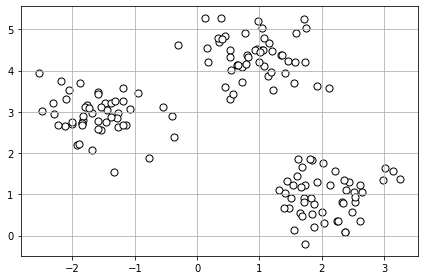

In [4]:
# visualizations
# 2차원 산점도
plt.scatter(X[:,0],
            X[:,1],
            c = 'white',
            marker = 'o',
            edgecolor = 'black',
            s = 50)
plt.grid()
plt.tight_layout()
plt.show()

Goal : 특성의 유사도에 기초하여 데이터를 그룹화한다.

### k-평균의 4단계 알고리즘
1. 데이터 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택
    - 초기 클러스터?
2. 각 데이터를 가장 가까운 센트로이드에 할당
3. 할당된 샘플들의 중심으로 센트로이드 이동
4. 클러스터 할당이 변하지 않거나, 사용자가 지정한 허용 오차나, 최대 반복 횟수에 도달할 때 까지 단계 2~3을 반복

### 유사도 측정?

임의의 차원공간에 놓인 두 점 사이의 유클리디안 거리 or 유클리디안 거리 제곱 지표를 이용해 최적화 문제를 푼다.  

- 최적화?
    - 클러스터 내 제곱 오차합 SSE를 반복적으로 최소화하는 과정
    - $SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{i,j}d(x^{(i)}, \mu^{(j)})^{2}$
        - $\mu$ mu : 임의의 클러스터의 대표 센트로이드(중심)
        - $w$ : 측정하려는 데이터와 클러스터에 의해 데이터가 클러스터 안에 있다면 1 아니면 0을 출력
        - 센트로이드와 가장 가까운 거리에 대하여 클러스터의 센트로이드간 거리를 계산

- 정리
    - 각 데이터를 가까운 센트로이드에 할당할 때 마다 센트로이드가 이동한다. (센트로이드는 매번 변화한다.)  
    - 최적화가 완료되는 시점 : 가까운 센트로이드에 데이터를 할당할 때 변화량에 대한 **허용 오차값**이 일정 수준 안이라면 클러스터가 더 변하지 않는다는 것이므로 최적화가 완료되었다고 볼수 있다.

- 왜곡
    - 점들 사이의 거리를 측정할 때, 점들의 단위와 변동 폭이 크다면? : 왜곡 발생확률 증가
    - 왜곡을 줄이기 위한 방법 : 표준화 (거리 산출시 불필요한 항목 특성을 제거)

In [5]:
from sklearn.cluster import KMeans

In [6]:
# 객체화
km = KMeans(n_clusters=3,   # 클러스터 개수
            init='random',  # k평균 알고리즘 설정을 위해 초기 센트로이드 무작위 할당
            n_init=10,      # 독립 시행 횟수 -> 오차를 최소화하는
            max_iter=300,   # 알고리즘의 2번 항목을 최대 300번까지 반복
            tol=1e-04,      # 허용 오차값
            random_state=0)

In [7]:
# km.fit_predict() : 군집 예측을 위한 함수
# X : 무작위 데이터
y_km = km.fit_predict(X)

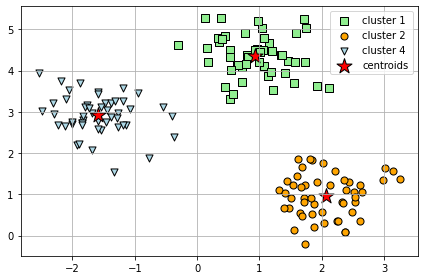

In [8]:
# visualizations
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            s=50, c='lightgreen', marker = 's', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            s=50, c='orange', marker = 'o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],
            s=50, c='lightblue', marker = 'v', edgecolor='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            s=250, marker="*", c="red", edgecolor="black", label="centroids")
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### 한계
1. 클러스터가 중첩되지 않는다.
2. 계층적이지 않다.
3. 클러스터에 하나 이상의 데이터가 할당되어야 한다.
    - 데이터가 하나의 클러스터로만 구분되지 않는 경우도 있기 때문

## k-means++

### 초기 클러스터 센트로이드 값을 더 정확하게 설정하기
데이터 개수가 적고, 무작위하게 설정된 초기 센트로이드값이 엉뚱한 곳이라면 모델 성능이 저하된다. 이를 해결하기 위해 `k-means++`알고리즘을 사용한다.

In [9]:
# KMeans의 두번째 속성 init을 'random'이 아닌 'k-means++'로 설정하면 된다.
# 초기 센트로이드가 최대한 멀리 떨어지도록 설정하는 권장 기본값

# 객체화
km = KMeans(n_clusters=3,       # 클러스터 개수
            init='k-means++',   # k평균 알고리즘 설정을 위해 초기 센트로이드 무작위 할당
            n_init=10,          # 독립 시행 횟수 -> 오차를 최소화하는
            max_iter=300,       # 알고리즘의 2번 항목을 최대 300번까지 반복
            tol=1e-04,          # 허용 오차값
            random_state=0)

## 성능 평가

In [10]:
# 앞에서 생성한 km객체의 inertia 속성에 SEE가 계산되어 있다.
# 왜곡값은 상대적으로 비교해야 한다.

print(f"왜곡 : {round(km.inertia_, 2)}")

AttributeError: 'KMeans' object has no attribute 'inertia_'

### 군집 품질 평가 방법
### 1. 엘보우 방법 Elbow Method -> 최적의 클러스터 개수 k를 추정할 수 있다.
1. 알고리즘 자체의 지표를 사용
2. 클러스터 내 오차 제곱합 SEE => 사이킷런 `km.inertia_`

$main\ idea$ : 왜곡이 빠르게 증가하는 지점의 k를 찾는다.

1. k값이 증가하면 센트로이드가 늘어난다.
2. 데이터들이 센트로이드에 더 가까워진다
3. 왜곡값 SSE가 감소한다.  


In [21]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)  # 클러스터의 개수 k가 i일 때 객체km에 저장된 오차를 저장

C:\ProgramData\Anaconda3\envs\tf2_py37\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
713.699828943416
283.461017802093
72.47601670996696
62.840617685422224
53.872026881310425
47.03725972751369
41.18648970744079
35.4060703235924
30.246853895434086
27.766482866006278


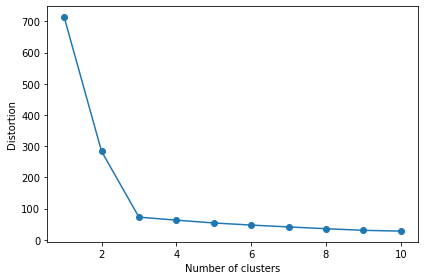

In [31]:
# visualizations
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# 사람의 팔꿈치 형상이라고 해서 엘보우 방법이라고 한다.

### 군집 품질 평가 방법
### 2. 실루엣 분석 Silhouette analysis

$main \ idea$ 클러스터 내 데이터들이 얼마나 조밀하게 모여있는지 측정하는 그래프 도구로, k-means 외 다른 군집 알고리즘에도 적용할 수 있다.

$$s^{(i)} = \frac{b^{(i)} -a^{(i)}}{max \{ {b^{(i)},a^{(i)} \} } }$$

- $(x^{(i)})$ : 하나의 임의의 데이터
- $(a^{(i)})$ : 클러스터 응집력
    - 데이터와 클러스터 내 다른 샘플의 유사한 정도
    - 작을수록 다른 데이터와 유사하다
- $(b^{(i)})$ : 클러스터 분리도
- $(s^{(i)})$ : 실루엣 계수

1. **하나의 임의의 데이터 $(x^{(i)})$** 와 같은 클러스터 안의 다른 모든 데이터 포인트 사이의 거리를 평균을 내어 **클러스터 응집력 $(a^{(i)})$** 을 계산한다.
2. 앞서 선정한 데이터와 가장 가까운 클러스터의 모든 샘플간 평균거리를 이용해 최근접 클러스터의 **클러스터 분리도 $C$**를 계산한다.
3. 클러스터 응집력 $(a^{(i)})$ 와 클러스터 분리도 $C$의 차를 둘 중 큰 값으로 나누어 **실루엣 계수 $(s^{(i)})$** 를 계산한다.  

**특징**
- 이상적인 실루엣 계수 $(s^{(i)})$ 는 1이 된다.
- 분리도 $(b^{(i)})$ 과 응집력 $(a^{(i)})$ 이 같다면 실루엣 계수 $(s^{(i)})$는 0이 된다.
    - 클러스터가 중첩되어 있다.
- 분리도 $(b^{(i)})$ **>** 응집력 $(a^{(i)})$ 라면 실루엣 계수 $(s^{(i)})$는 1에 가까워진다.
- $\therefore$ 이상적인 분리도가 응집력보다 클 수록 좋다.

In [28]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [29]:
# silhouette_sample(임의의 데이터셋, 데이터에 대한 예측 클러스터를 포함한 객체, 거리측정 방식)
silhouette_vals = silhouette_samples(X, y_km, metric="euclidean")

In [30]:
km = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

In [31]:
cluster_labels = np.unique(y_km)    #[0 1 2]
n_clusters = cluster_labels.shape[0]  # 3

Text(0.5, 0, 'Silhouette coefficient')

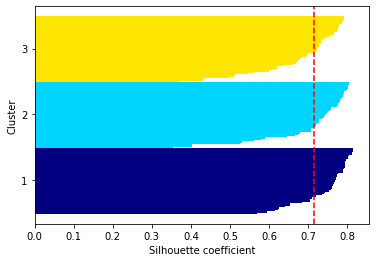

In [32]:
# visualizations
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)  # cm : module of matplotlib
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = "none", color = color)  # plt.barh?
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

시각화 결과에서 클러스터의 크기와 이상치를 가진 클러스터를 확인할 수 있다.  
예시 그래프는 실루엣 계수 $(s^{(i)})$가 1에 가까우므로 군집이 잘 형성되었다고 볼 수 있다.

**군집이 잘 형성되지 않은 경우 확인**

In [33]:
# 군집이 잘 형성되지 않은 경우 : 엘보우 방법에서 오차가 컸던 2를 k값으로 설정

km = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

# silhouette_sample(임의의 데이터셋, 데이터에 대한 예측 클러스터를 포함한 객체, 거리측정 방식)
silhouette_vals = silhouette_samples(X, y_km, metric="euclidean")

In [34]:
cluster_labels = np.unique(y_km)    #[0 1]
n_clusters = cluster_labels.shape[0]  # 2

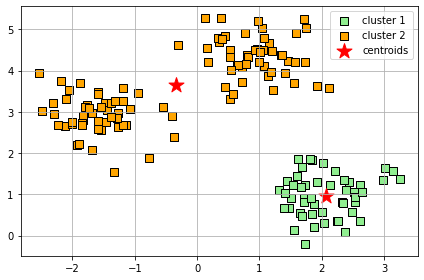

In [35]:
# visualizations : scatter
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            s = 50, c="lightgreen", edgecolor="black", marker="s", label="cluster 1")
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            s = 50, c="orange", edgecolor="black", marker="s", label="cluster 2")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1],
            s = 250, marker = "*", c="red", label="centroids")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

군집의 센트로이드가 엉뚱한 곳에 있는 것을 확인할 수 있다.

Text(0.5, 0, 'Silhouette coefficient')

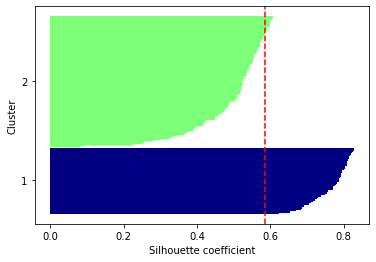

In [36]:
# visualizations : silhouette
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)  # cm : module of matplotlib
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = "none", color = color)  # plt.barh?
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

## 정리 : 군집분석

1. **비지도학습 알고리즘** : 클래스 레이블이 없는 데이터를 특정 군집으로 묶기 위해 활용
2. **분야** : k-means 알고리즘은 학계와 산업현장을 가리지 않고 활용
3. **k-means++** : k-means의 무작위성을 보완하기 위한 기법
4. 그 외의 알고리즘 : 계층군집, 밀집도 기반 군집 (클러스터모양이 원형이 아닐 때 사용)